In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Чтение файлов

In [5]:
users = pd.read_csv("users.tsv", sep="\t")
history = pd.read_csv("history.tsv", sep="\t")
validate_answers = pd.read_csv("validate_answers.tsv", sep="\t")
validate =pd.read_csv("validate.tsv", sep="\t")

# 1. Исследуем пользователей

In [6]:
users

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4
...,...,...,...,...
27764,27764,1,38,295
27765,27765,2,30,79
27766,27766,2,21,1953
27767,27767,2,17,0


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  27769 non-null  int64
 1   sex      27769 non-null  int64
 2   age      27769 non-null  int64
 3   city_id  27769 non-null  int64
dtypes: int64(4)
memory usage: 867.9 KB


In [8]:
users.nunique()

user_id    27769
sex            3
age          107
city_id     2457
dtype: int64

In [9]:
users.describe()

,user_id,sex,age,city_id
count,27769.000000,27769.000000,27769.000000,27769.000000
mean,13884.000000,1.475134,28.894847,240.141165
std,8016.364149,0.501549,18.510084,466.122195
min,0.000000,0.000000,0.000000,0.000000
25%,6942.000000,1.000000,18.000000,0.000000
50%,13884.000000,1.000000,27.000000,25.000000
75%,20826.000000,2.000000,36.000000,231.000000
max,27768.000000,2.000000,118.000000,2456.000000


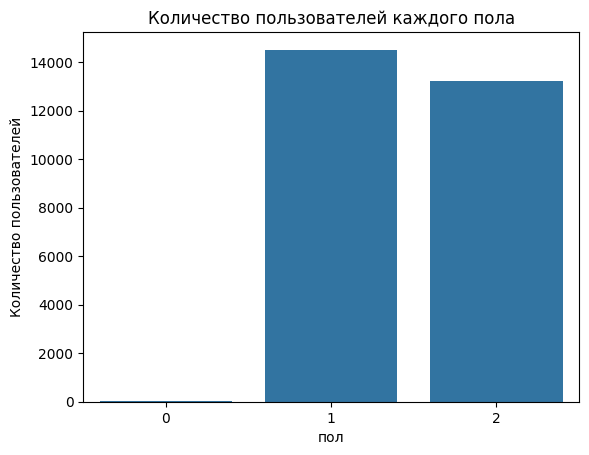

In [29]:
sns.countplot(x=users['sex'])
plt.ylabel("Количество пользователей")
plt.xlabel("пол")
plt.title("Количество пользователей каждого пола")
plt.show()


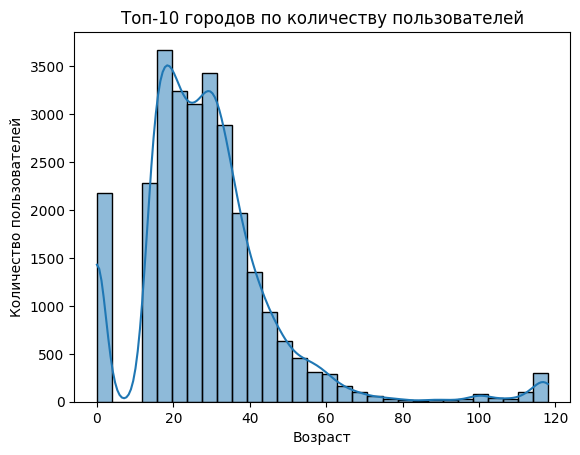

In [11]:
sns.histplot(users['age'], bins=30, kde=True)
plt.ylabel("Количество пользователей")
plt.xlabel("Возраст")
plt.title("Распределение количества пользователей по возрастам")
plt.show()

In [12]:
top_cities = users['city_id'].value_counts().head(10)

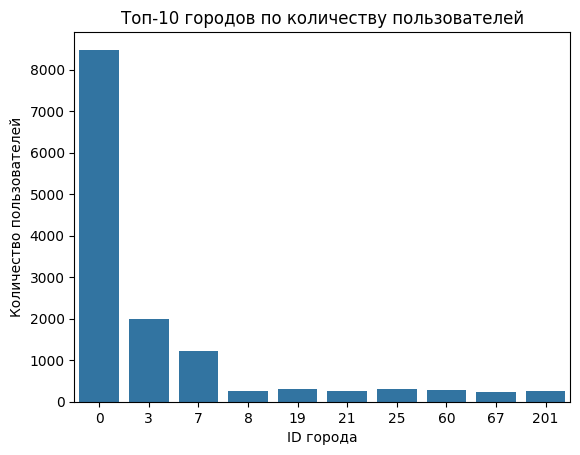

In [13]:
sns.barplot(y=top_cities.values, x=top_cities.index)
plt.ylabel("Количество пользователей")
plt.xlabel("ID города")
plt.title("Топ-10 городов по количеству пользователей")
plt.show()

# 2. Исследуем историю пользователей

In [14]:
history

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148
...,...,...,...,...
1147852,382,45.00,1,7871
1147853,360,33.35,1,7992
1147854,381,205.00,1,21516
1147855,383,37.50,1,8224


In [15]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147857 entries, 0 to 1147856
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   hour       1147857 non-null  int64  
 1   cpm        1147857 non-null  float64
 2   publisher  1147857 non-null  int64  
 3   user_id    1147857 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 35.0 MB


In [16]:
history.describe()

,hour,cpm,publisher,user_id
count,1.147857e+06,1.147857e+06,1.147857e+06,1.147857e+06
mean,7.603016e+02,1.864043e+02,2.004760e+00,1.384739e+04
std,4.306159e+02,4.557257e+02,2.061949e+00,8.028620e+03
min,3.000000e+00,3.000000e+01,1.000000e+00,0.000000e+00
25%,3.920000e+02,5.500000e+01,1.000000e+00,6.817000e+03
50%,7.620000e+02,1.100000e+02,1.000000e+00,1.394100e+04
75%,1.138000e+03,2.100000e+02,2.000000e+00,2.075900e+04
max,1.490000e+03,2.090540e+05,2.100000e+01,2.776800e+04


In [17]:
history.nunique()

hour          1488
cpm          74301
publisher       21
user_id      25536
dtype: int64

In [18]:
history['hour'].value_counts()

hour
1245    1279
1437    1278
1412    1273
1388    1265
1389    1262
        ... 
243      198
3        196
459      195
651      185
843      174
Name: count, Length: 1488, dtype: int64

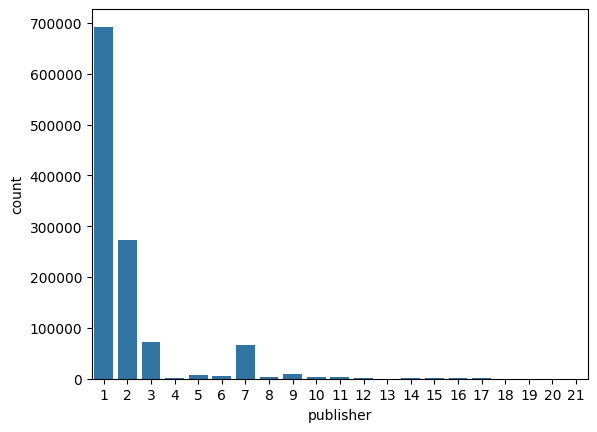

In [19]:
sns.countplot(x=history['publisher'])
plt.show()


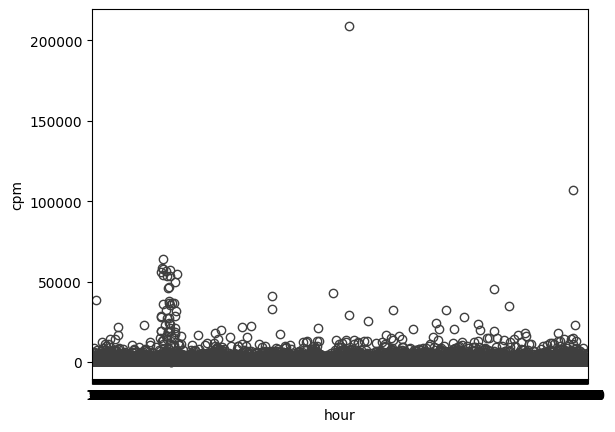

In [20]:
sns.boxplot(x=history['hour'], y=history['cpm'])
plt.show()


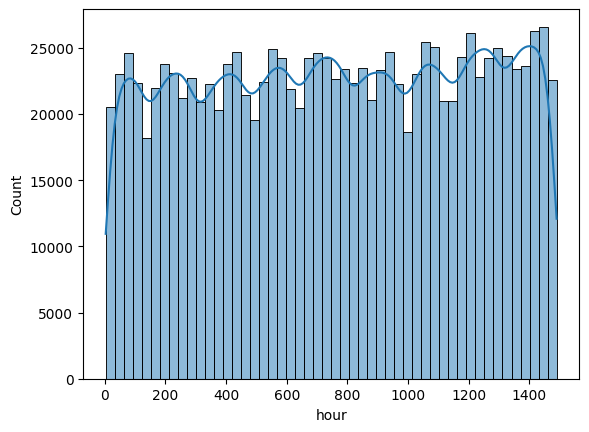

In [21]:
sns.histplot(history['hour'], bins=50, kde=True)
plt.show()

In [22]:
user_ad_views = history.groupby('user_id').size().reset_index(name = 'ad_views_count')
view_counts = user_ad_views['ad_views_count'].value_counts().sort_index()
total_users = len(user_ad_views)
view_counts_percent = view_counts / total_users * 100

In [23]:
user_ad_views

,user_id,ad_views_count
0,0,2
1,1,82
2,3,8
3,4,132
4,5,9
...,...,...
25531,27764,43
25532,27765,79
25533,27766,54
25534,27767,1


In [24]:
view_counts

ad_views_count
1       2508
2       1637
3       1200
4       1036
5        831
        ... 
765        1
884        1
938        1
1140       1
1226       1
Name: count, Length: 463, dtype: int64

In [25]:
view_counts_percent

ad_views_count
1       9.821429
2       6.410558
3       4.699248
4       4.057018
5       3.254229
          ...   
765     0.003916
884     0.003916
938     0.003916
1140    0.003916
1226    0.003916
Name: count, Length: 463, dtype: float64

In [26]:
print("Доля пользователей, которые видели рекламу 1 раз:", view_counts_percent.get(1, 0), "%")
print("Доля пользователей, которые видели рекламу 2 раза:", view_counts_percent.get(2, 0), "%")
print("Доля пользователей, которые видели рекламу 3 раза:", view_counts_percent.get(3, 0), "%")

Доля пользователей, которые видели рекламу 1 раз: 9.821428571428571 %
Доля пользователей, которые видели рекламу 2 раза: 6.410557644110276 %
Доля пользователей, которые видели рекламу 3 раза: 4.6992481203007515 %


In [27]:
# Определяем количество показов для каждого user_id в конкретный час и на конкретной площадке
history["count"] = history.groupby(["user_id", "hour", "publisher"])['cpm'].transform("count")

# Определяем максимальный CPM среди других участников аукциона
history["max_cpm_other"] = history.groupby(["hour", "publisher"])['cpm'].transform(lambda x: x.dropna().max())

# Определяем вероятность выигрыша аукциона
history["win_prob"] = 0.0
history.loc[history["cpm"] > history["max_cpm_other"], "win_prob"] = 1.0
history.loc[history["cpm"] == history["max_cpm_other"], "win_prob"] = 0.5

# Вычисляем таргеты
def compute_targets(df):
    return pd.Series({
        "at_least_one": (df["win_prob"] > 0).mean(),
        "at_least_two": (df["win_prob"] * df["count"] >= 2).mean(),
        "at_least_three": (df["win_prob"] * df["count"] >= 3).mean()
    })

targets = history.groupby(["cpm", "hour", "publisher"]).apply(compute_targets).reset_index()


KeyboardInterrupt: 

In [ ]:
history

In [ ]:
targets

# 3. Исследуем валидационный набор

In [30]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpm            1008 non-null   float64
 1   hour_start     1008 non-null   int64  
 2   hour_end       1008 non-null   int64  
 3   publishers     1008 non-null   object 
 4   audience_size  1008 non-null   int64  
 5   user_ids       1008 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.4+ KB


In [31]:
validate.describe()

,cpm,hour_start,hour_end,audience_size
count,1008.000000,1008.000000,1008.000000,1008.000000
mean,162.425595,1065.046627,1166.225198,1090.087302
std,112.192984,192.984789,192.168496,613.557243
min,30.000000,747.000000,753.000000,300.000000
25%,79.000000,906.000000,1019.000000,575.000000
50%,130.000000,1048.000000,1184.000000,960.000000
75%,220.000000,1214.250000,1325.250000,1464.000000
max,475.000000,1485.000000,1488.000000,2500.000000


In [32]:
validate.nunique()

cpm              253
hour_start       538
hour_end         544
publishers       629
audience_size    205
user_ids         974
dtype: int64

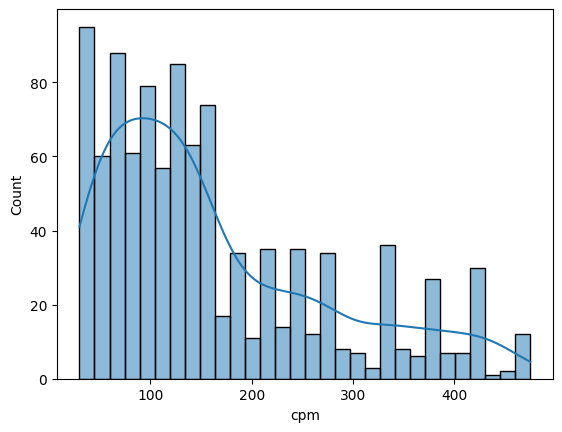

In [33]:
sns.histplot(validate['cpm'], bins=30, kde=True)
plt.show()


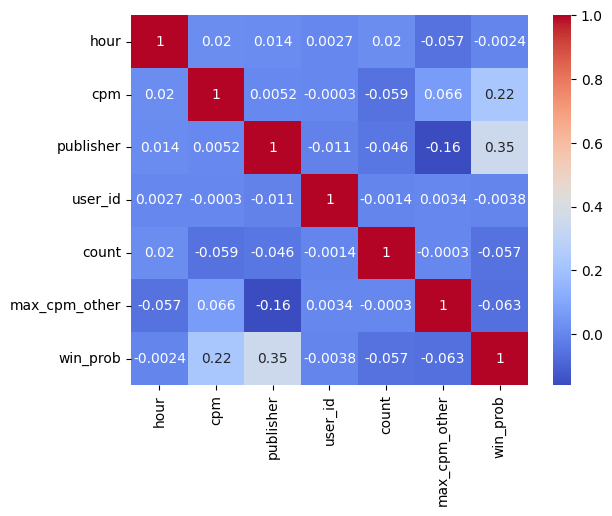

In [34]:
corr_matrix = history.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


# Вопросы

1. `validate_answers.tsv`:
- `at_least_one` - доля пользователей, которая увидит объявление хотя бы один раз
- `at_least_two` - доля пользователей, которая увидит объявление хотя бы два раза
- `at_least_three` - доля пользователей, которая увидит объявление хотя бы три раза

что значит "доля пользователей" ? это доля (часть) от всех пользователей или вероятность что пользователь увидит объявление? применимы ли здесь уже фильтры (пол, возраст и тд.)

2. Как извлечь таргет
   Надо узнать долю посмотревших рекламу, но т.к. напрямую у нас нет таких данные, это надо сделать косвенно. Считается ли у нас что в исторических данных 100% показанная реклама?


   "Число уникальных пользователей, которым была показана реклама, делится на общее количество пользователей, чтобы получить долю тех, кто "увидел" рекламу."

   Наша задча "Ваша задача – предсказать, какое количество людей увидят конкретное рекламное объявление в будущем." Мы можем узнать количество людей которые смотрят какие-то объявления. но как узнать что они увидели что-то конкретное? 

Итак, что понятно
1. Историчсекие данные - это уже показанная реклама пользователям.
2. У нас нет, что конкретно видели пользователи
3. Значит мы должны по косвенным признакам (чена, площадка, время) классифицировать нашу рекламу.
4. Далее посчитать количество пользователей, которые видели рекламу каждого "типа/класса"
5. Наша модель может предсказывать какое количество пользователей увидит рекламу, которую мы хотим показать
6. Чтобы найти долю, делим предсказанное на то какой размер аудитории мы выбираем


Что не понятно. В валидацинном наборе явно должна быть реклама которая задана в один часовой диапазон, пока не понятно как учесть аукцион, и как учесть именно аудиторию (точнее характеристики аудитории как пол, возраст и город). и то что эта реклама явно не должна торчать на площадке весь часовой диапазон, а должна сваливать если пользователь ее уже видел, но если прошло 6 часов, то он может снова её увидеть.

In [ ]:
users_by_price = history.groupby('cpm')['user_id'].nunique().reset_index()

# Переименовываем столбцы для понятности
users_by_price.columns = ['cpm', 'unique_users']
all_users_by_price = history.groupby('cpm')['user_id'].count().reset_index()

# Переименовываем столбцы для понятности
all_users_by_price.columns = ['cpm', 'all_users']

# Объединяем оба DataFrame по 'cpm'
users_by_price = pd.merge(users_by_price, all_users_by_price, on='cpm')

# Выводим таблицу с ценами и количеством пользователей
print(users_by_price)
users_by_price.to_csv('users_by_price', index=False)

In [ ]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.bar(users_by_price['cpm'], users_by_price['unique_users'], color='skyblue')
plt.xlabel('Цена (CPM)', fontsize=14)
plt.ylabel('Количество уникальных пользователей', fontsize=14)
plt.title('Количество пользователей по цене CPM', fontsize=16)
plt.xticks(users_by_price['cpm'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Показать график
plt.show()